## Chernoff's inequality program

In [107]:
# Chernoff.py
# imports
import numpy as np
from scipy.stats import norm #normは正規分布
import matplotlib.pyplot as plt

# variables
X = np.arange(0, 100, 0.1)
#pdfは確率密度関数
#E[x]:50, V[x]:10^2
Y = norm.pdf(X, 50, 10)
Y_rvs = norm.rvs(50,10,1000)
A = np.full(shape=1000,fill_value=60)
a = 60

#### Markov's inequality program

In [83]:
# return Markov's inqeuality upper bound
def Markov(Ex=50, a=60):
    if a > 0:
        return Ex/a
    else:
        print("a must be Positive real number")
        return -1


#### What is X & Y ?

In [84]:
X[::10]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96., 97., 98., 99.])

In [85]:
Y[::10]

array([1.48671951e-07, 2.43896075e-07, 3.96129909e-07, 6.36982518e-07,
       1.01408521e-06, 1.59837411e-06, 2.49424713e-06, 3.85351967e-06,
       5.89430678e-06, 8.92616572e-06, 1.33830226e-05, 1.98655471e-05,
       2.91946926e-05, 4.24780271e-05, 6.11901930e-05, 8.72682695e-05,
       1.23221917e-04, 1.72256894e-04, 2.38408820e-04, 3.26681906e-04,
       4.43184841e-04, 5.95253242e-04, 7.91545158e-04, 1.04209348e-03,
       1.35829692e-03, 1.75283005e-03, 2.23945303e-03, 2.83270377e-03,
       3.54745928e-03, 4.39835960e-03, 5.39909665e-03, 6.56158148e-03,
       7.89501583e-03, 9.40490774e-03, 1.10920835e-02, 1.29517596e-02,
       1.49727466e-02, 1.71368592e-02, 1.94186055e-02, 2.17852177e-02,
       2.41970725e-02, 2.66085250e-02, 2.89691553e-02, 3.12253933e-02,
       3.33224603e-02, 3.52065327e-02, 3.68270140e-02, 3.81387815e-02,
       3.91042694e-02, 3.96952547e-02, 3.98942280e-02, 3.96952547e-02,
       3.91042694e-02, 3.81387815e-02, 3.68270140e-02, 3.52065327e-02,
      

In [86]:
# np.sum(Y)/10 near equal Probability
print("Y's sum is "+str(np.sum(Y)))

Y's sum is 9.999994265729676


In [108]:
Y_rvs

array([38.47333126, 51.85672414, 44.44338257, 38.85206303, 58.34155549,
       55.4563905 , 69.7516134 , 44.78528243, 42.62794138, 46.50010465,
       51.9644692 , 51.09667922, 41.52371901, 50.5686141 , 40.43822262,
       60.25704207, 41.0782509 , 74.84946033, 49.40774687, 55.82652059,
       54.37132601, 60.44296464, 46.90830116, 34.15827723, 56.94702194,
       53.88154203, 84.83215275, 58.36634738, 44.34385574, 51.40552511,
       63.62785331, 52.36151014, 47.67561505, 44.04796379, 42.9009657 ,
       54.76925341, 55.59091935, 31.4601423 , 65.34438448, 51.91108912,
       47.37684225, 53.87671607, 37.84086722, 50.80873825, 32.65715449,
       43.67195491, 64.01944438, 52.70156981, 43.18226032, 61.49143382,
       29.61657727, 54.77374427, 46.89678498, 47.17066501, 57.41500296,
       53.00607295, 54.44318839, 36.7540843 , 48.66501703, 53.39006532,
       51.77903649, 59.58653192, 42.1226929 , 53.12581999, 44.13329074,
       43.45945295, 31.88165285, 60.15990852, 53.42064597, 32.64

#### Calc Chernoff's ineuality

In [110]:
# ref : https://note.nkmk.me/python-for-usage/
def Chernoff(t):
    Ex = 0
    for fx in Y_rvs:
        Ex += ((np.exp(t*fx)/10)/np.exp(a*t))/len(Y_rvs)
    return Ex
    # print("t = "+str(t)+"'s last E[x] = "+str(Ex))

# test
loop_list = np.arange(0.001, 1, 0.001)
min_apper_bound = [2147483647, -1]
for loop in loop_list:
    work = Chernoff(loop)
    if work < float(min_apper_bound[0]):
        min_apper_bound[0] = work
        min_apper_bound[1] = loop
print("minimum apper bound is "+str(min_apper_bound[0])+" (t = '"+str(min_apper_bound[1])+"')")

minimum apper bound is 0.05979480998167609 (t = '0.1')


In [88]:
Markov(Ex=50, a=a)

0.8333333333333334

In [89]:
# X[0] = 0.0, X[1] = 0.1, ..., X[600] = 60.0, ... 
apper = np.sum(Y[600:])/10
lower = np.sum(Y[:600])/10
print("Pr(x>=a) = "+str(apper))
print("  <= E[exp(tx)]/exp(ta) = "+str(min_apper_bound[0]))
print("    <= E[x]/a = "+str(Markov(50,a)))
# print("Pr(x<a) = "+str(lower))
# print("Pr(x) = "+str(apper+lower))
# print("Pr(x<a) = "+str(np.sum(Y[400:600])/10))

Pr(x>=a) = 0.1598668298363647
  <= E[exp(tx)]/exp(ta) = 0.6065110409869217
    <= E[x]/a = 0.8333333333333334


#### plot graph

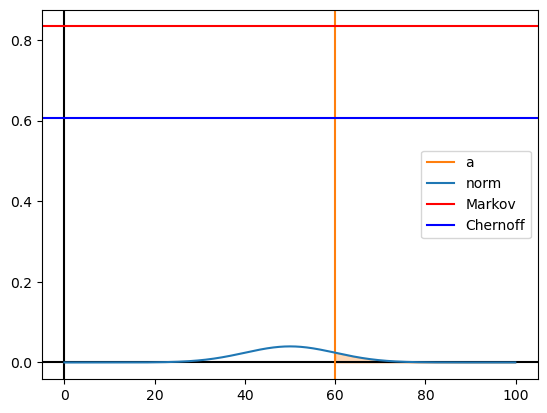

In [105]:
# #グラフの表示
plt.axhline(0,  color='k')
plt.axvline(0,  color='k')
plt.axvline(60, color='C1', label="a")
plt.plot(X, Y, label="norm")
plt.fill_between(X, Y, where=(X >= A), alpha=0.3, color='C1')

plt.axhline(Markov(50,a), color='r', label="Markov")
plt.axhline(min_apper_bound[0], color='b', label="Chernoff")

plt.legend()
plt.show()